In [1]:
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
from models.random_forest import random_forest_session
from models.random_forest import run_backtest
notebook_path = os.path.abspath(os.path.join(os.getcwd(), '../notebooks'))
input_file_path = rf'{notebook_path}\data\processed\session'
model_output_filepath = rf'{notebook_path}\output\model'

 **Trading session/sub-session times (NYC time):**

- asian: 19:00 (prev day) - 04:00
- asian_morning: 19:00 (prev day) - 01:00
- london: 03:00 - 12:00
- london_morning: 03:00 - 07:00
- london_afternoon: 07:00 - 12:00
- ny: 08:00 - 17:00
- ny_morning: 08:00 - 12:00
- ny_evening: 12:00 - 17:00

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 257
Training days: 154, Testing days: 51, Backtesting days: 52
{'Accuracy': 0.5236593059936908, 'Confusion Matrix': array([[161, 156],
       [146, 171]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.51      0.52       317\n           1       0.52      0.54      0.53       317\n\n    accuracy                           0.52       634\n   macro avg       0.52      0.52      0.52       634\nweighted avg       0.52      0.52      0.52       634\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 588
     tick                   datetime    price  actual_open_price  predicted  \
0    5904  2023-10-18 07:31:00-04:00  1.

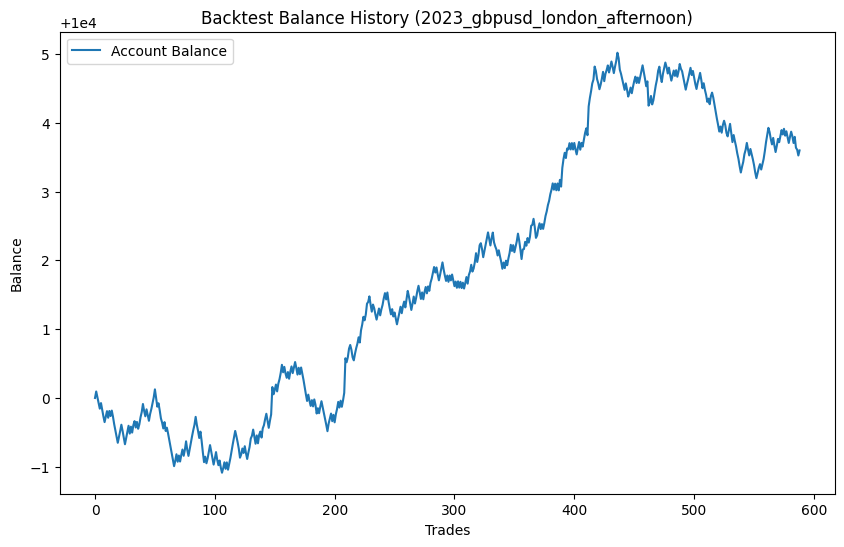

In [2]:
# Step 1: Loading the Data
year = "2023"
ccy = "gbpusd"
session = "london_afternoon"
file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_prev_price_as_base.csv'
# Load the dataset
df = pd.read_csv(file_path)
backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 306
Training days: 183, Testing days: 61, Backtesting days: 62
{'Accuracy': 0.48286604361370716, 'Confusion Matrix': array([[81, 82],
       [84, 74]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.49      0.50      0.49       163\n           1       0.47      0.47      0.47       158\n\n    accuracy                           0.48       321\n   macro avg       0.48      0.48      0.48       321\nweighted avg       0.48      0.48      0.48       321\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 303
     tick                   datetime    price  actual_open_price  predicted  \
0    5855  2023-10-17 02:01:00-04:00  1.21915            1.21879          0   
1    5856  2023-10-17 02:23:00-04:00  1.21815 

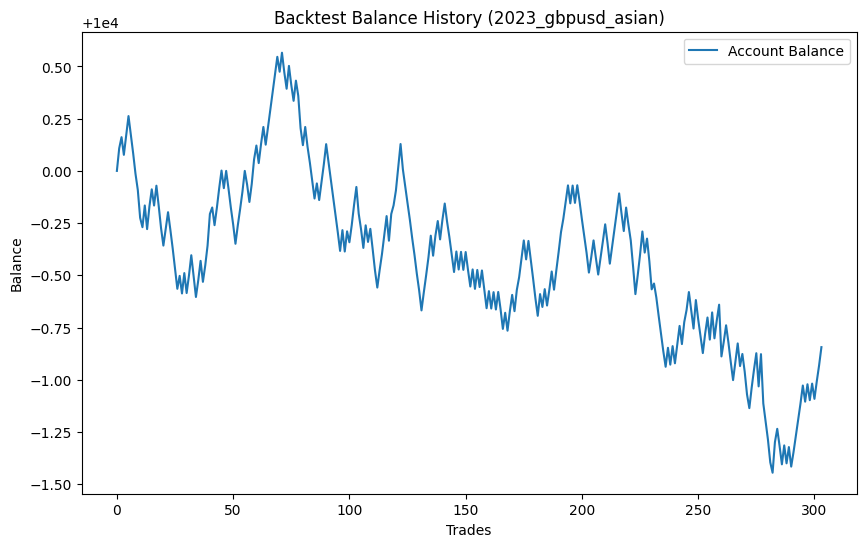

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 290
Training days: 174, Testing days: 58, Backtesting days: 58
{'Accuracy': 0.5376344086021505, 'Confusion Matrix': array([[33, 55],
       [31, 67]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.38      0.43        88\n           1       0.55      0.68      0.61        98\n\n    accuracy                           0.54       186\n   macro avg       0.53      0.53      0.52       186\nweighted avg       0.53      0.54      0.53       186\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 172
     tick                   datetime   price  actual_open_price  predicted  \
0    3551  2023-10-19 03:22:00-04:00  1.0547            1.05478          1   
1    3552  2023-10-19 03:47:00-04:00  1.0537     

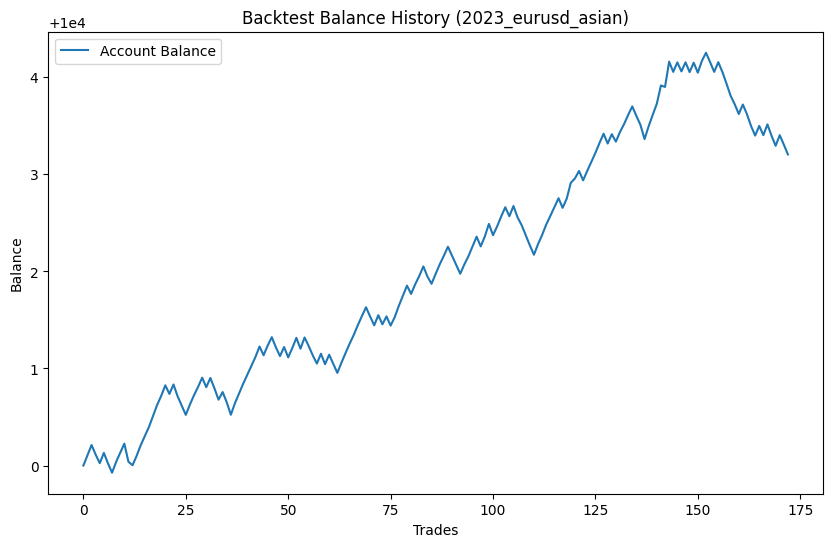

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 310
Training days: 186, Testing days: 62, Backtesting days: 62
{'Accuracy': 0.47516198704103674, 'Confusion Matrix': array([[205,  17],
       [226,  15]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.48      0.92      0.63       222\n           1       0.47      0.06      0.11       241\n\n    accuracy                           0.48       463\n   macro avg       0.47      0.49      0.37       463\nweighted avg       0.47      0.48      0.36       463\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 882
      tick                   datetime    price  actual_open_price  predicted  \
0     8254  2023-10-18 03:36:00-04:00  149.725            149.732          0   
1     8258  2023-10-18 20:02:00-04:00  1

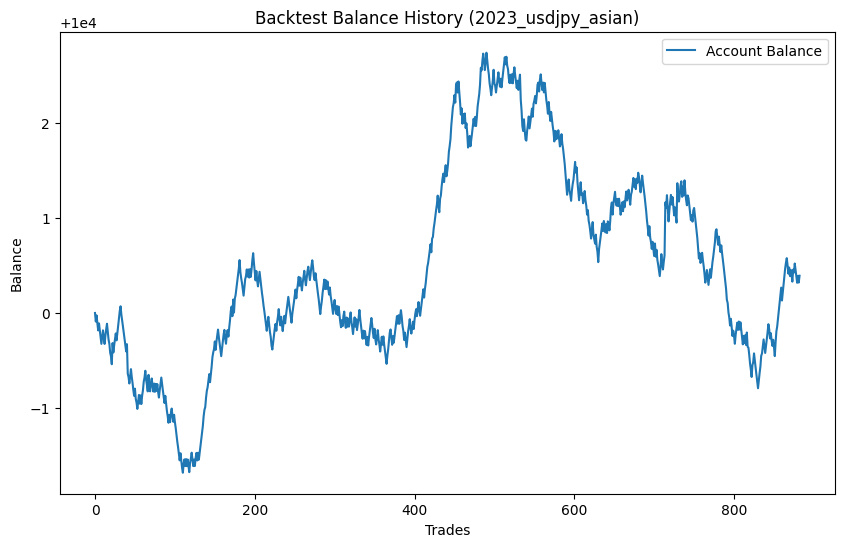

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 225
Training days: 135, Testing days: 45, Backtesting days: 45
{'Accuracy': 0.4888888888888889, 'Confusion Matrix': array([[13, 24],
       [22, 31]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.37      0.35      0.36        37\n           1       0.56      0.58      0.57        53\n\n    accuracy                           0.49        90\n   macro avg       0.47      0.47      0.47        90\nweighted avg       0.48      0.49      0.49        90\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 76
    tick                   datetime    price  actual_open_price  predicted  \
0   1518  2023-10-13 03:27:00-04:00  0.86372            0.86365          1   
1   1526  2023-10-17 02:57:00-04:00  0.86572      

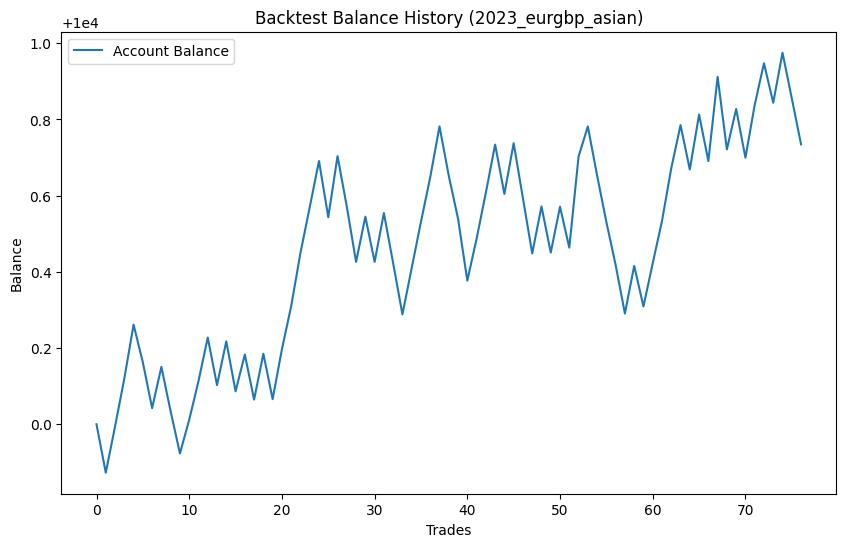

In [3]:
year = "2023"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "asian"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_prev_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 256
Training days: 153, Testing days: 51, Backtesting days: 52
{'Accuracy': 0.4883720930232558, 'Confusion Matrix': array([[32, 32],
       [34, 31]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.48      0.50      0.49        64\n           1       0.49      0.48      0.48        65\n\n    accuracy                           0.49       129\n   macro avg       0.49      0.49      0.49       129\nweighted avg       0.49      0.49      0.49       129\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 126
     tick                   datetime    price  predicted  actual  fx_return  \
0    5742  2023-10-10 00:18:00-04:00  1.22315          1       0  -0.075161   
1    5766  2023-10-10 19:12:00-04:00  1.22915  

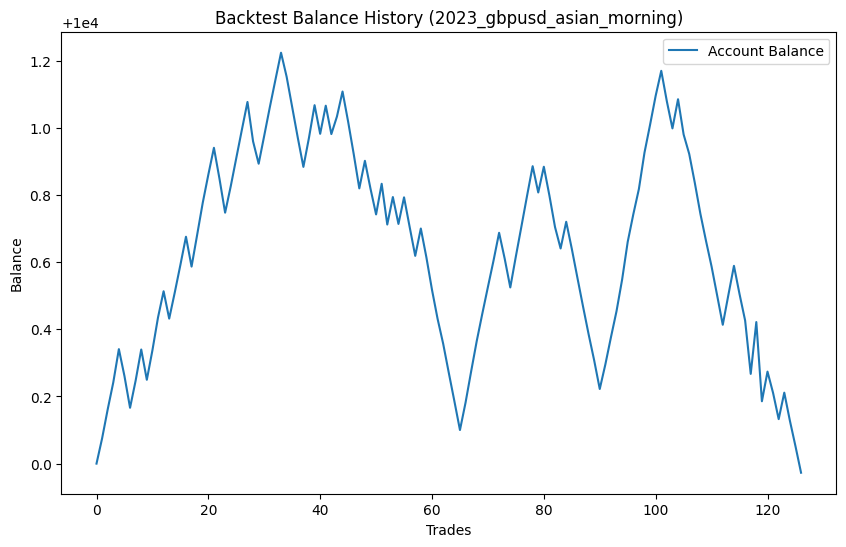

Unique session days: 207
Training days: 124, Testing days: 41, Backtesting days: 42
{'Accuracy': 0.4153846153846154, 'Confusion Matrix': array([[ 8, 24],
       [14, 19]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.36      0.25      0.30        32\n           1       0.44      0.58      0.50        33\n\n    accuracy                           0.42        65\n   macro avg       0.40      0.41      0.40        65\nweighted avg       0.40      0.42      0.40        65\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 65
    tick                   datetime   price  predicted  actual  fx_return  \
0   3487  2023-10-12 19:57:00-04:00  1.0537          0       1   0.102599   
1   3488  2023-10-12 23:05:00-04:00  1.0547         

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


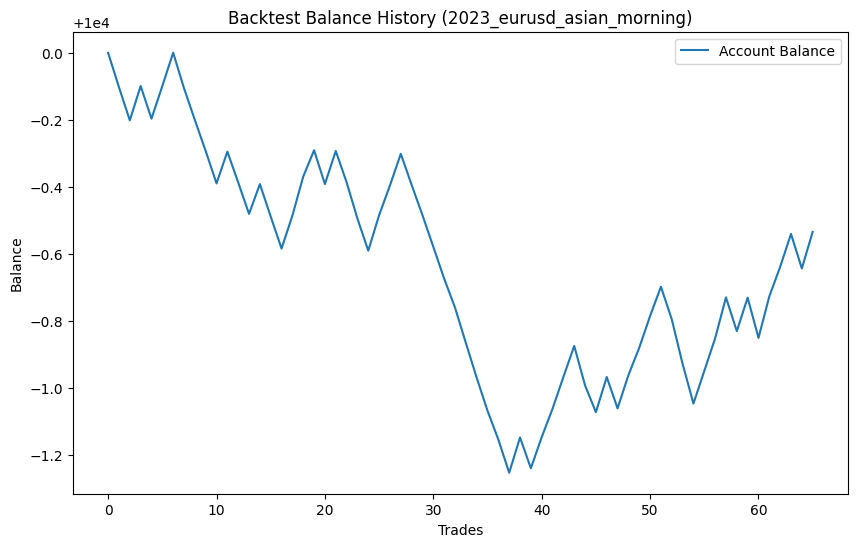

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 291
Training days: 174, Testing days: 58, Backtesting days: 59
{'Accuracy': 0.5179153094462541, 'Confusion Matrix': array([[128,  11],
       [137,  31]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.48      0.92      0.63       139\n           1       0.74      0.18      0.30       168\n\n    accuracy                           0.52       307\n   macro avg       0.61      0.55      0.46       307\nweighted avg       0.62      0.52      0.45       307\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 539
      tick                   datetime    price  predicted  actual  fx_return  \
0     8252  2023-10-17 20:21:00-04:00  149.725          0       0  -0.072082   
1     8253  2023-10-17 23:08:00-04:00  14

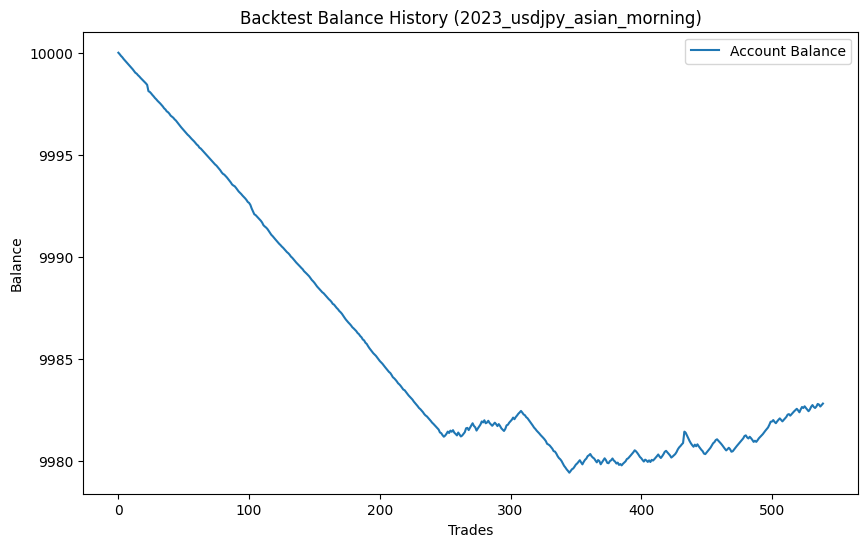

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')
c:\Users\mmori\Documents\fx_strategy_project\fx_strategy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mmori\Documents\fx_strategy_project\fx_strategy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being se

Unique session days: 100
Training days: 60, Testing days: 20, Backtesting days: 20
{'Accuracy': 0.7727272727272727, 'Confusion Matrix': array([[ 0,  5],
       [ 0, 17]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         5\n           1       0.77      1.00      0.87        17\n\n    accuracy                           0.77        22\n   macro avg       0.39      0.50      0.44        22\nweighted avg       0.60      0.77      0.67        22\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 23
    tick                   datetime    price  predicted  actual  fx_return  \
0   1479  2023-10-03 19:10:00-04:00  0.86672          1       1   0.130545   
1   1486  2023-10-04 20:08:00-04:00  0.86572       

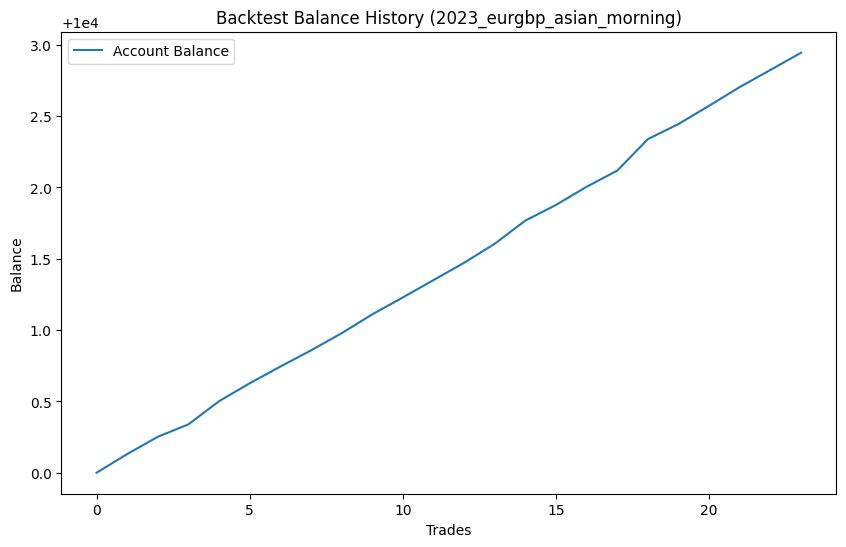

In [17]:
year = "2023"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "asian_morning"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_prev_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 257
Training days: 154, Testing days: 51, Backtesting days: 52
{'Accuracy': 0.5139484978540773, 'Confusion Matrix': array([[243, 230],
       [223, 236]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.51      0.52       473\n           1       0.51      0.51      0.51       459\n\n    accuracy                           0.51       932\n   macro avg       0.51      0.51      0.51       932\nweighted avg       0.51      0.51      0.51       932\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 885
     tick                   datetime    price  predicted  actual  fx_return  \
0    5897  2023-10-18 03:10:00-04:00  1.22015          1       1   0.113202   
1    5898  2023-10-18 03:52:00-04:00  1.21915      

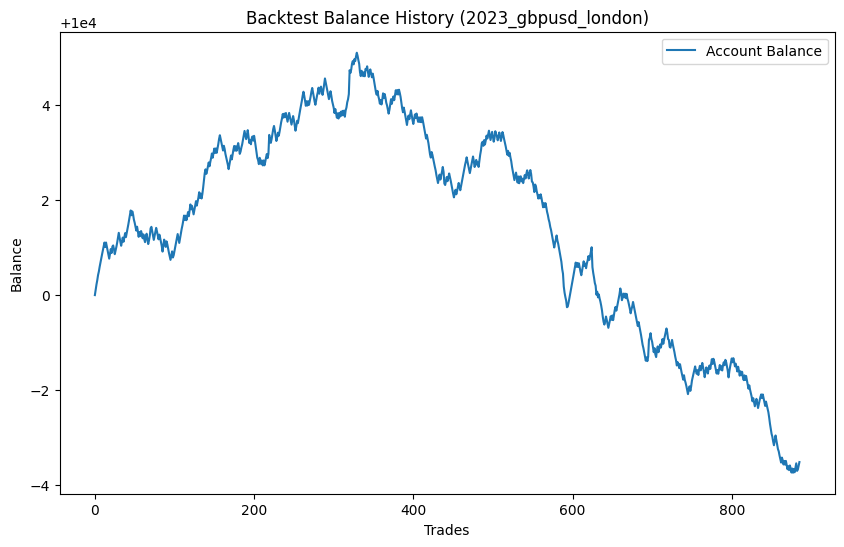

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 258
Training days: 154, Testing days: 51, Backtesting days: 53
{'Accuracy': 0.5637342908438061, 'Confusion Matrix': array([[164, 128],
       [115, 150]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.59      0.56      0.57       292\n           1       0.54      0.57      0.55       265\n\n    accuracy                           0.56       557\n   macro avg       0.56      0.56      0.56       557\nweighted avg       0.56      0.56      0.56       557\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 596
     tick                   datetime   price  predicted  actual  fx_return  \
0    3516  2023-10-17 03:10:00-04:00  1.0547          0       1   0.101549   
1    3517  2023-10-17 04:37:00-04:00  1.0537         

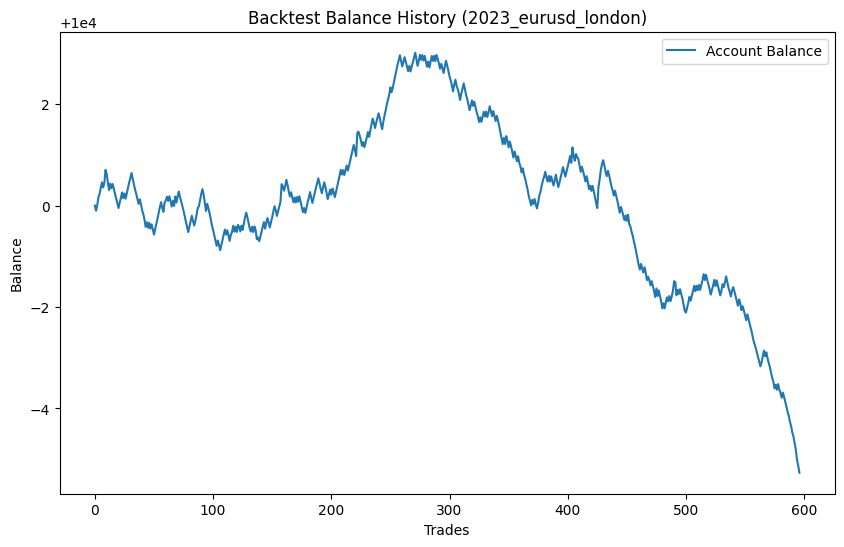

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 258
Training days: 154, Testing days: 51, Backtesting days: 53
{'Accuracy': 0.4843962008141113, 'Confusion Matrix': array([[322,  21],
       [359,  35]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.47      0.94      0.63       343\n           1       0.62      0.09      0.16       394\n\n    accuracy                           0.48       737\n   macro avg       0.55      0.51      0.39       737\nweighted avg       0.55      0.48      0.38       737\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 1115
       tick                   datetime    price  predicted  actual  fx_return  \
0      8241  2023-10-17 06:14:00-04:00  149.425          0       0  -0.141686   
1      8242  2023-10-17 06:40:00-04:00  149.52

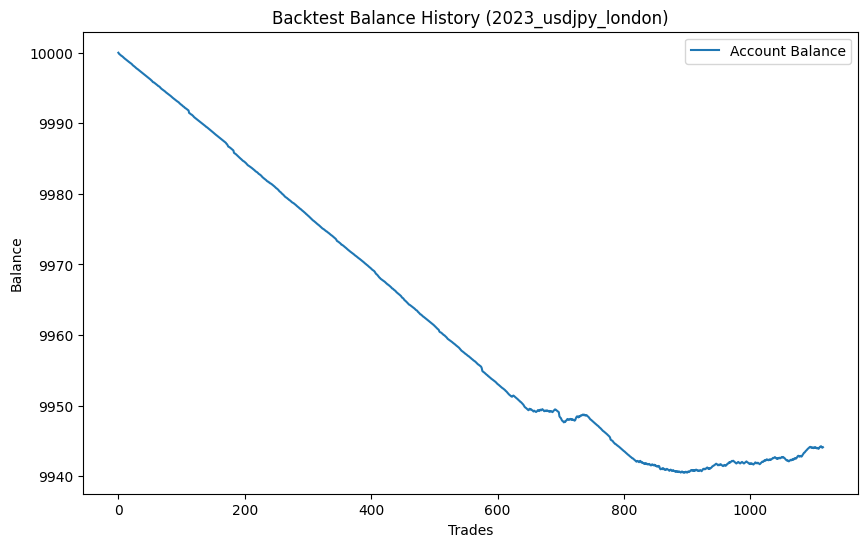

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 255
Training days: 153, Testing days: 51, Backtesting days: 51
{'Accuracy': 0.4461538461538462, 'Confusion Matrix': array([[35, 63],
       [45, 52]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.44      0.36      0.39        98\n           1       0.45      0.54      0.49        97\n\n    accuracy                           0.45       195\n   macro avg       0.44      0.45      0.44       195\nweighted avg       0.44      0.45      0.44       195\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 193
     tick                   datetime    price  predicted  actual  fx_return  \
0    1533  2023-10-18 03:21:00-04:00  0.86672          0       0  -0.099131   
1    1534  2023-10-18 03:54:00-04:00  0.86772          

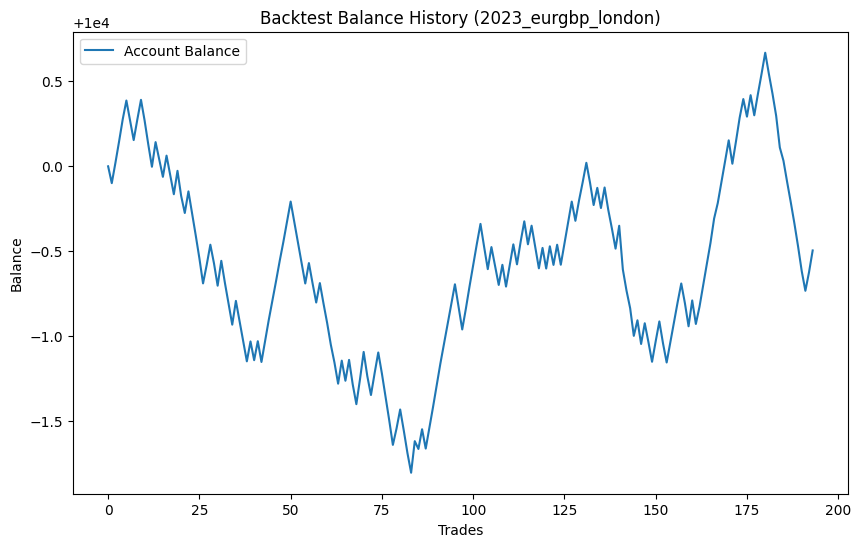

In [16]:
year = "2023"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "london"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_prev_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 257
Training days: 154, Testing days: 51, Backtesting days: 52
{'Accuracy': 0.4865771812080537, 'Confusion Matrix': array([[82, 74],
       [79, 63]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.51      0.53      0.52       156\n           1       0.46      0.44      0.45       142\n\n    accuracy                           0.49       298\n   macro avg       0.48      0.48      0.48       298\nweighted avg       0.49      0.49      0.49       298\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 297
     tick                   datetime    price  predicted  actual  fx_return  \
0    5897  2023-10-18 03:10:00-04:00  1.22015          0       1   0.113202   
1    5898  2023-10-18 03:52:00-04:00  1.21915          

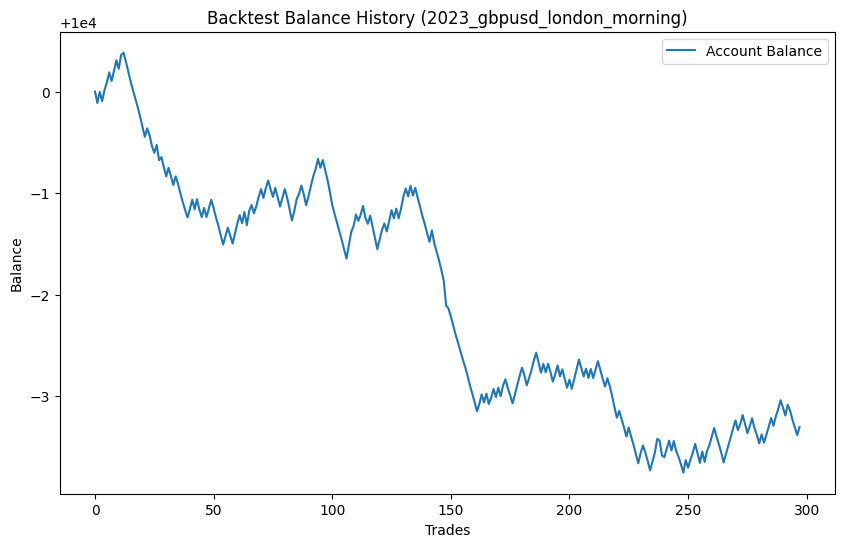

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 252
Training days: 151, Testing days: 50, Backtesting days: 51
{'Accuracy': 0.5256410256410257, 'Confusion Matrix': array([[40, 40],
       [34, 42]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.54      0.50      0.52        80\n           1       0.51      0.55      0.53        76\n\n    accuracy                           0.53       156\n   macro avg       0.53      0.53      0.53       156\nweighted avg       0.53      0.53      0.53       156\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 181
     tick                   datetime   price  predicted  actual  fx_return  \
0    3538  2023-10-18 03:01:00-04:00  1.0577          0       0  -0.103896   
1    3539  2023-10-18 05:52:00-04:00  1.0567          0  

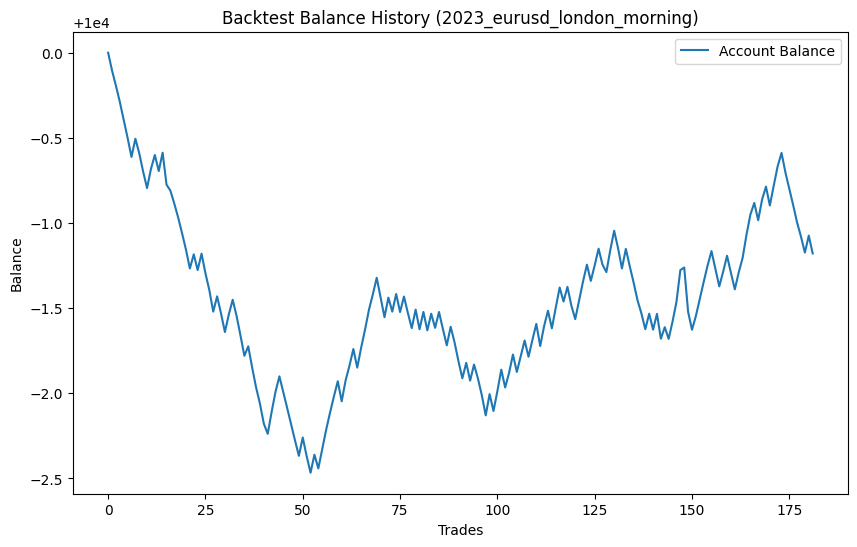

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 250
Training days: 150, Testing days: 50, Backtesting days: 50
{'Accuracy': 0.49344978165938863, 'Confusion Matrix': array([[ 95,   9],
       [107,  18]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.47      0.91      0.62       104\n           1       0.67      0.14      0.24       125\n\n    accuracy                           0.49       229\n   macro avg       0.57      0.53      0.43       229\nweighted avg       0.58      0.49      0.41       229\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 372
      tick                   datetime    price  predicted  actual  fx_return  \
0     8218  2023-10-13 04:07:00-04:00  149.625          0       0  -0.068793   
1     8219  2023-10-13 05:08:00-04:00  149.725  

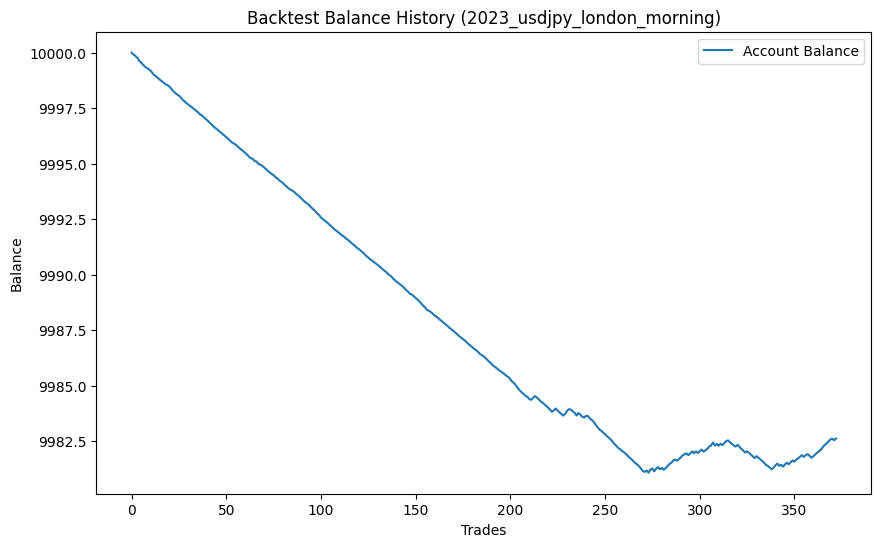

Unique session days: 230
Training days: 138, Testing days: 46, Backtesting days: 46


c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


{'Accuracy': 0.41935483870967744, 'Confusion Matrix': array([[19, 21],
       [33, 20]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.37      0.47      0.41        40\n           1       0.49      0.38      0.43        53\n\n    accuracy                           0.42        93\n   macro avg       0.43      0.43      0.42        93\nweighted avg       0.44      0.42      0.42        93\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 91
    tick                   datetime    price  predicted  actual  fx_return  \
0   1544  2023-10-20 04:28:00-04:00  0.87372          0       1   0.116876   
1   1548  2023-10-23 04:56:00-04:00  0.87172          1       1   0.122890   
2   1553  2023-10-24 04:35:00-04:00  0.86872          0       0

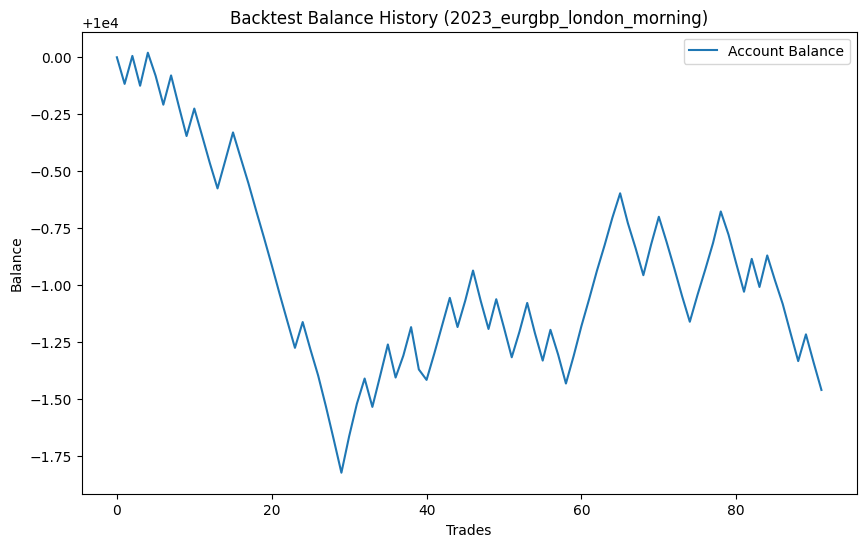

In [15]:
year = "2023"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "london_morning"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_prev_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 257
Training days: 154, Testing days: 51, Backtesting days: 52
{'Accuracy': 0.5236593059936908, 'Confusion Matrix': array([[161, 156],
       [146, 171]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.51      0.52       317\n           1       0.52      0.54      0.53       317\n\n    accuracy                           0.52       634\n   macro avg       0.52      0.52      0.52       634\nweighted avg       0.52      0.52      0.52       634\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 588
     tick                   datetime    price  predicted  actual  fx_return  \
0    5904  2023-10-18 07:31:00-04:00  1.21915          1       1   0.094416   
1    5905  2023-10-18 08:19:00-04:00  1.22015      

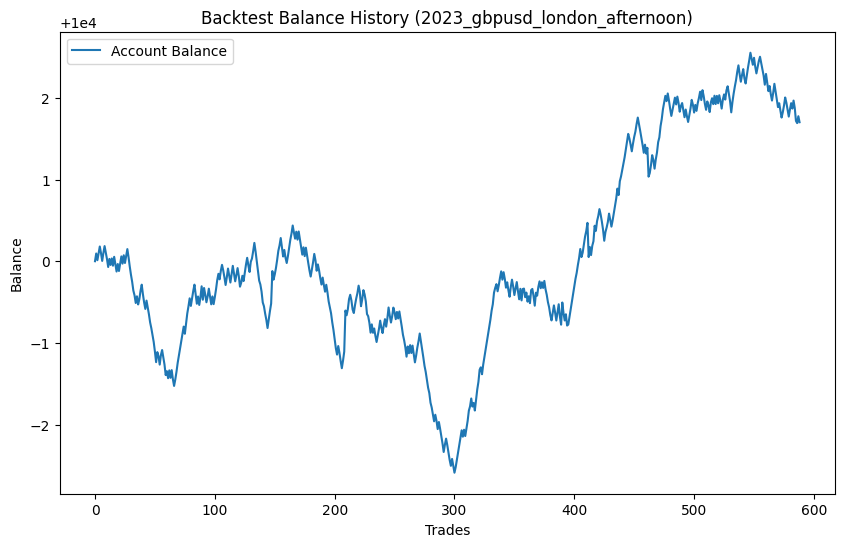

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 256
Training days: 153, Testing days: 51, Backtesting days: 52
{'Accuracy': 0.49754901960784315, 'Confusion Matrix': array([[ 94, 120],
       [ 85, 109]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.53      0.44      0.48       214\n           1       0.48      0.56      0.52       194\n\n    accuracy                           0.50       408\n   macro avg       0.50      0.50      0.50       408\nweighted avg       0.50      0.50      0.50       408\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 399
     tick                   datetime   price  predicted  actual  fx_return  \
0    3541  2023-10-18 07:37:00-04:00  1.0567          1       1   0.097566   
1    3542  2023-10-18 08:41:00-04:00  1.0557        

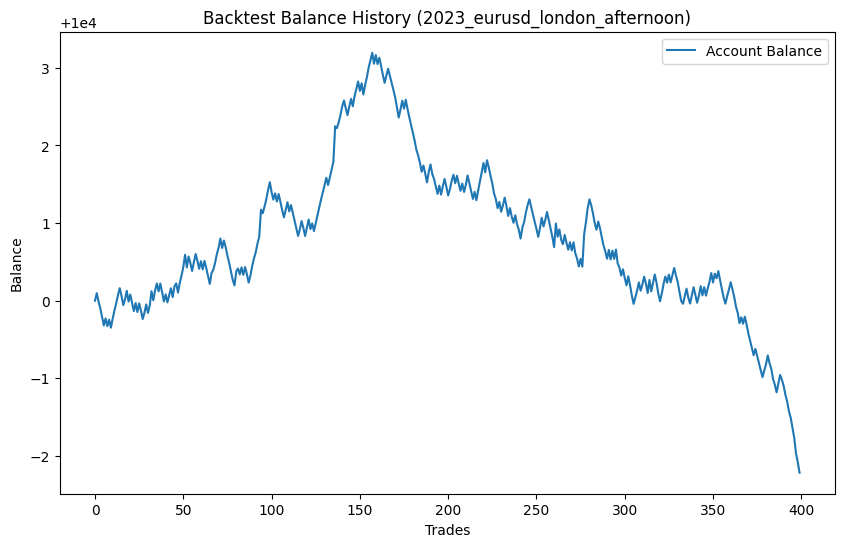

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 256
Training days: 153, Testing days: 51, Backtesting days: 52
{'Accuracy': 0.49619771863117873, 'Confusion Matrix': array([[231,  19],
       [246,  30]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.48      0.92      0.64       250\n           1       0.61      0.11      0.18       276\n\n    accuracy                           0.50       526\n   macro avg       0.55      0.52      0.41       526\nweighted avg       0.55      0.50      0.40       526\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 746
      tick                   datetime    price  predicted  actual  fx_return  \
0     8243  2023-10-17 07:34:00-04:00  149.425          0       0  -0.070889   
1     8244  2023-10-17 08:20:00-04:00  149.525  

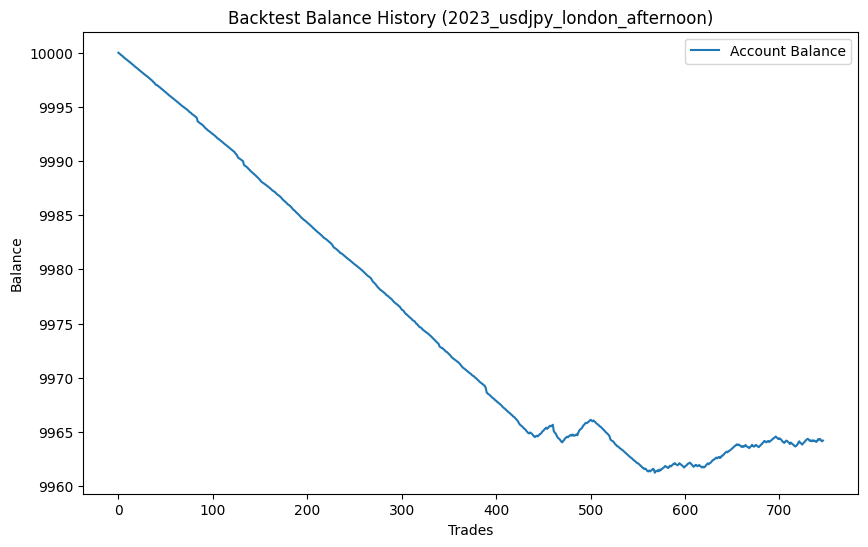

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 234
Training days: 140, Testing days: 46, Backtesting days: 48
{'Accuracy': 0.509090909090909, 'Confusion Matrix': array([[34, 28],
       [26, 22]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.57      0.55      0.56        62\n           1       0.44      0.46      0.45        48\n\n    accuracy                           0.51       110\n   macro avg       0.50      0.50      0.50       110\nweighted avg       0.51      0.51      0.51       110\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 105
     tick                   datetime    price  predicted  actual  fx_return  \
0    1508  2023-10-11 08:48:00-04:00  0.86172          0       0  -0.106653   
1    1509  2023-10-11 10:41:00-04:00  0.86272          0

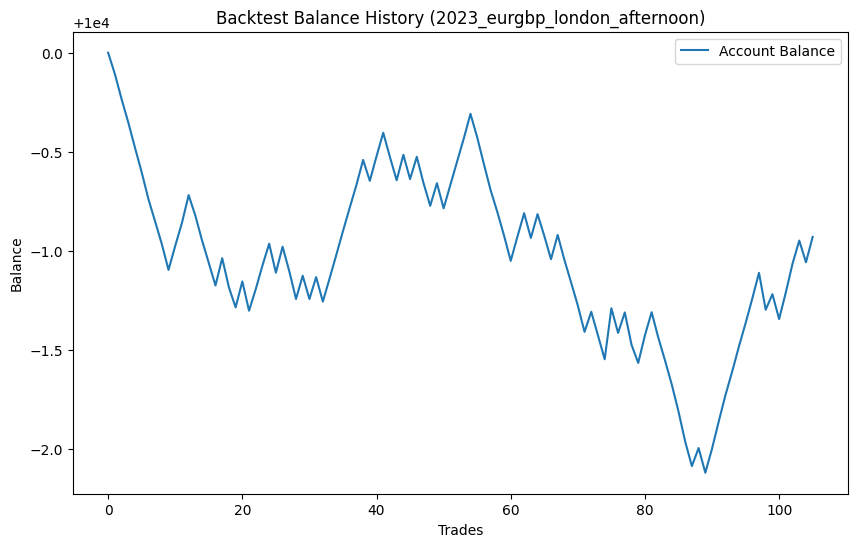

In [14]:
year = "2023"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "london_afternoon"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_prev_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 258
Training days: 154, Testing days: 51, Backtesting days: 53
{'Accuracy': 0.5067750677506775, 'Confusion Matrix': array([[164, 213],
       [151, 210]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.44      0.47       377\n           1       0.50      0.58      0.54       361\n\n    accuracy                           0.51       738\n   macro avg       0.51      0.51      0.50       738\nweighted avg       0.51      0.51      0.50       738\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 754
     tick                   datetime    price  predicted  actual  fx_return  \
0    5905  2023-10-18 08:19:00-04:00  1.22015          1       1   0.082024   
1    5906  2023-10-18 08:36:00-04:00  1.21915      

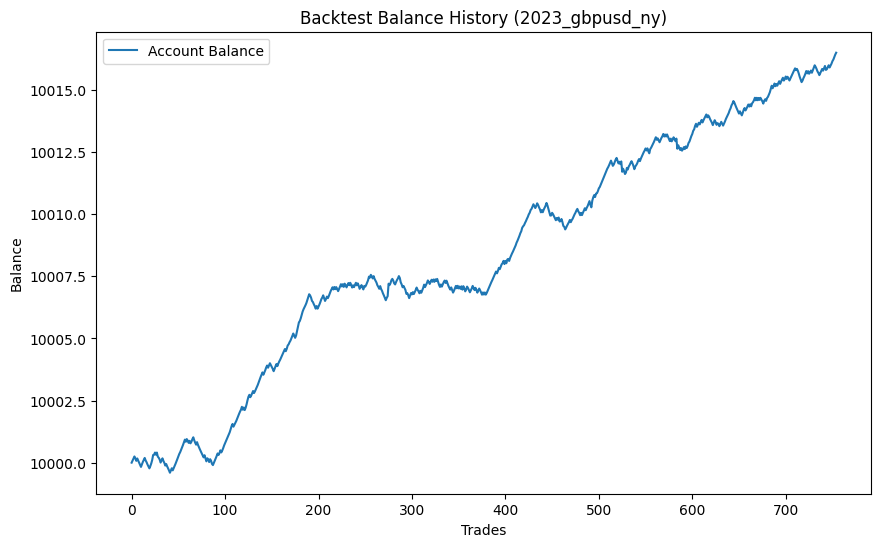

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 257
Training days: 154, Testing days: 51, Backtesting days: 52
{'Accuracy': 0.5210420841683366, 'Confusion Matrix': array([[120, 149],
       [ 90, 140]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.57      0.45      0.50       269\n           1       0.48      0.61      0.54       230\n\n    accuracy                           0.52       499\n   macro avg       0.53      0.53      0.52       499\nweighted avg       0.53      0.52      0.52       499\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 488
     tick                   datetime   price  predicted  actual  fx_return  \
0    3542  2023-10-18 08:41:00-04:00  1.0557          1       0  -0.107880   
1    3543  2023-10-18 10:02:00-04:00  1.0547         

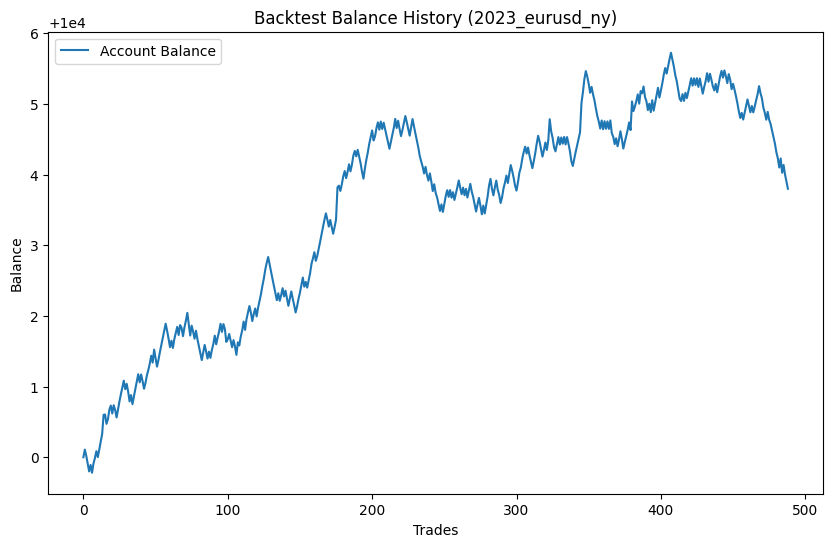

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 260
Training days: 156, Testing days: 52, Backtesting days: 52
{'Accuracy': 0.47020933977455714, 'Confusion Matrix': array([[269,  10],
       [319,  23]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.46      0.96      0.62       279\n           1       0.70      0.07      0.12       342\n\n    accuracy                           0.47       621\n   macro avg       0.58      0.52      0.37       621\nweighted avg       0.59      0.47      0.35       621\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 923
      tick                   datetime    price  predicted  actual  fx_return  \
0     8260  2023-10-19 11:01:00-04:00  149.925          0       1   0.064070   
1     8261  2023-10-19 11:45:00-04:00  149.825  

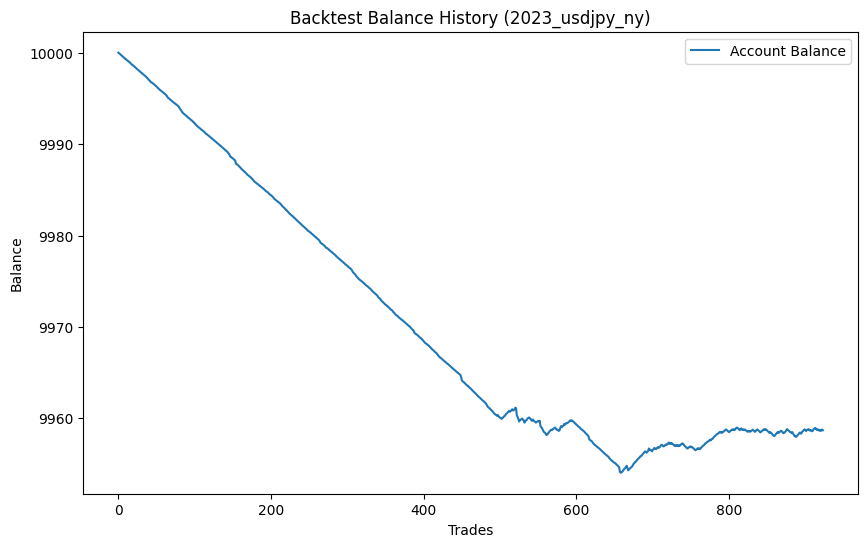

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 244
Training days: 146, Testing days: 48, Backtesting days: 50
{'Accuracy': 0.47863247863247865, 'Confusion Matrix': array([[40, 29],
       [32, 16]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.56      0.58      0.57        69\n           1       0.36      0.33      0.34        48\n\n    accuracy                           0.48       117\n   macro avg       0.46      0.46      0.46       117\nweighted avg       0.47      0.48      0.48       117\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 125
     tick                   datetime    price  predicted  actual  fx_return  \
0    1514  2023-10-12 10:53:00-04:00  0.86372          0       1   0.127505   
1    1515  2023-10-12 13:02:00-04:00  0.86472         

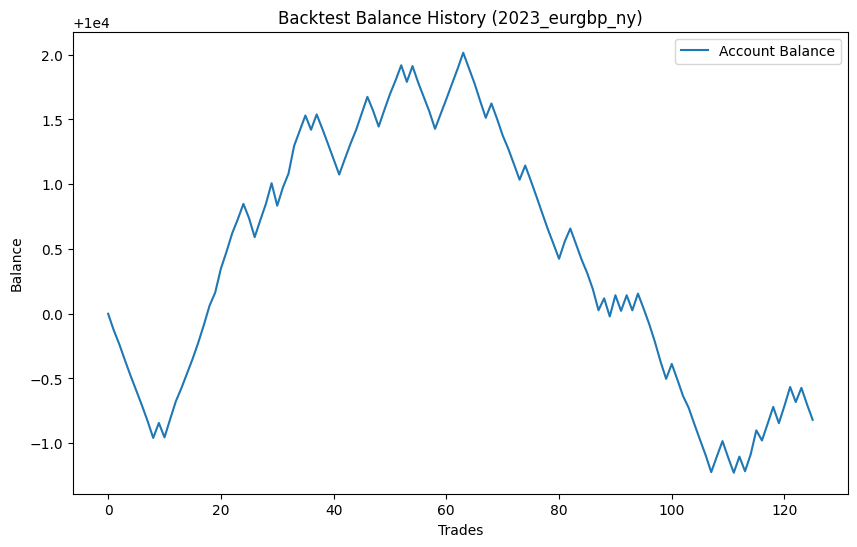

In [19]:
year = "2023"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "ny"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_prev_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 255
Training days: 153, Testing days: 51, Backtesting days: 51
{'Accuracy': 0.4990859232175503, 'Confusion Matrix': array([[122, 152],
       [122, 151]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.50      0.45      0.47       274\n           1       0.50      0.55      0.52       273\n\n    accuracy                           0.50       547\n   macro avg       0.50      0.50      0.50       547\nweighted avg       0.50      0.50      0.50       547\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 503
     tick                   datetime    price  predicted  actual  fx_return  \
0    5932  2023-10-19 08:19:00-04:00  1.21315          1       1   0.074235   
1    5933  2023-10-19 08:58:00-04:00  1.21415      

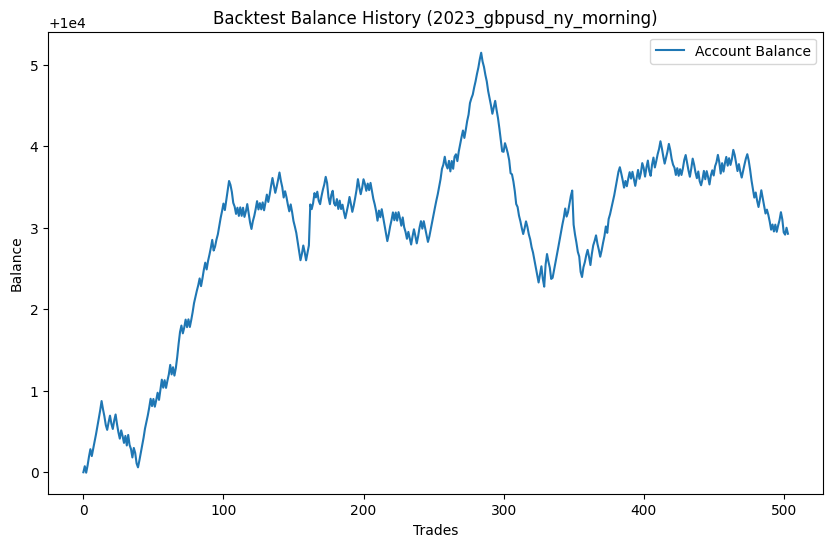

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 254
Training days: 152, Testing days: 50, Backtesting days: 52
{'Accuracy': 0.5092838196286472, 'Confusion Matrix': array([[ 81, 117],
       [ 68, 111]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.54      0.41      0.47       198\n           1       0.49      0.62      0.55       179\n\n    accuracy                           0.51       377\n   macro avg       0.52      0.51      0.51       377\nweighted avg       0.52      0.51      0.50       377\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 346
     tick                   datetime   price  predicted  actual  fx_return  \
0    3542  2023-10-18 08:41:00-04:00  1.0557          1       0  -0.107880   
1    3543  2023-10-18 10:02:00-04:00  1.0547         

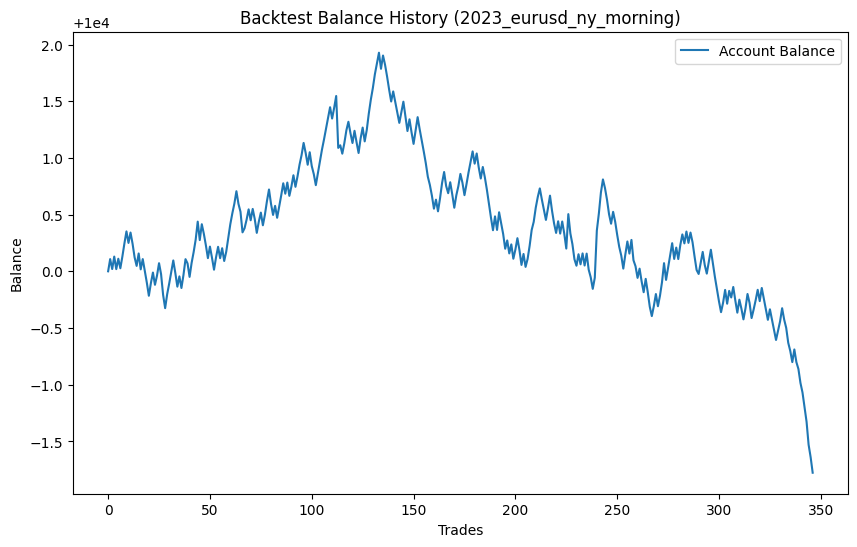

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 256
Training days: 153, Testing days: 51, Backtesting days: 52
{'Accuracy': 0.5042372881355932, 'Confusion Matrix': array([[212,  13],
       [221,  26]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.49      0.94      0.64       225\n           1       0.67      0.11      0.18       247\n\n    accuracy                           0.50       472\n   macro avg       0.58      0.52      0.41       472\nweighted avg       0.58      0.50      0.40       472\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 651
      tick                   datetime    price  predicted  actual  fx_return  \
0     8244  2023-10-17 08:20:00-04:00  149.525          0       1   0.070270   
1     8245  2023-10-17 08:31:00-04:00  149.625   

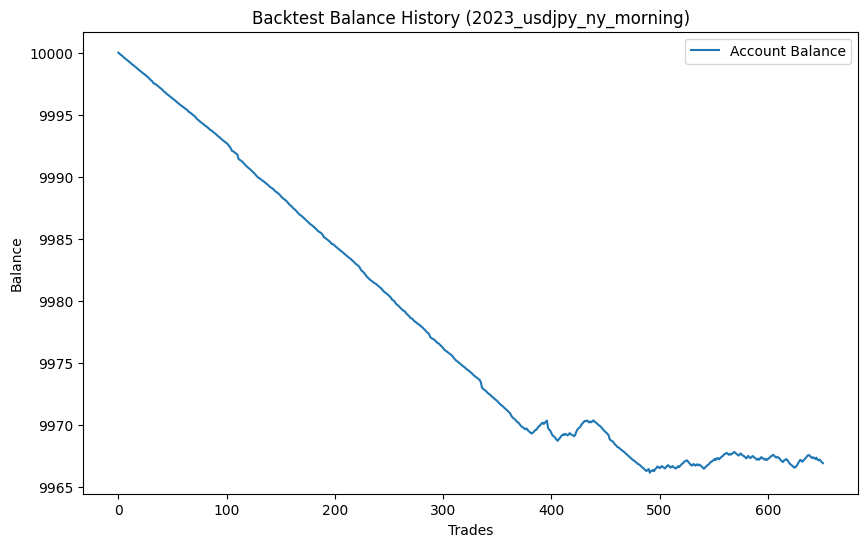

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 223
Training days: 133, Testing days: 44, Backtesting days: 46
{'Accuracy': 0.40860215053763443, 'Confusion Matrix': array([[25, 28],
       [27, 13]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.48      0.47      0.48        53\n           1       0.32      0.33      0.32        40\n\n    accuracy                           0.41        93\n   macro avg       0.40      0.40      0.40        93\nweighted avg       0.41      0.41      0.41        93\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 89
    tick                   datetime    price  predicted  actual  fx_return  \
0   1496  2023-10-09 10:35:00-04:00  0.86372          0       0  -0.151447   
1   1502  2023-10-10 08:52:00-04:00  0.86472          0  

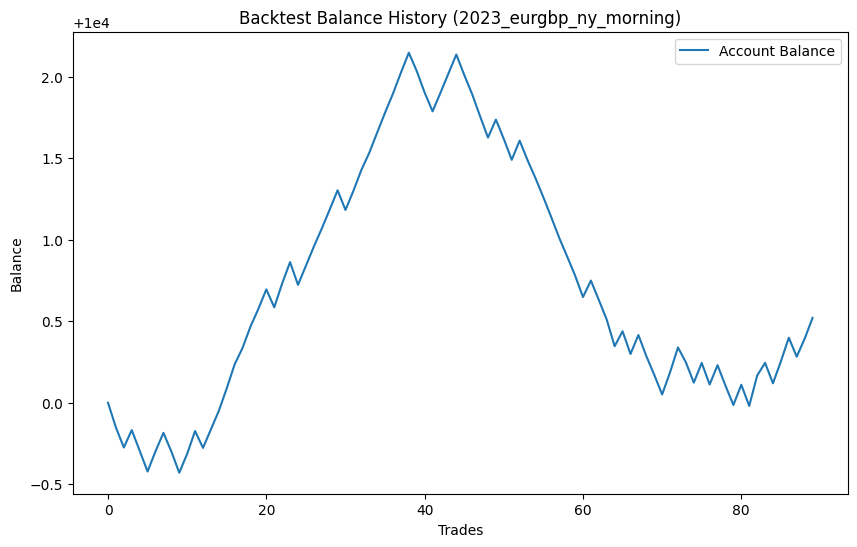

In [20]:
year = "2023"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "ny_morning"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_prev_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 239
Training days: 143, Testing days: 47, Backtesting days: 49
{'Accuracy': 0.5271739130434783, 'Confusion Matrix': array([[41, 61],
       [26, 56]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.61      0.40      0.49       102\n           1       0.48      0.68      0.56        82\n\n    accuracy                           0.53       184\n   macro avg       0.55      0.54      0.52       184\nweighted avg       0.55      0.53      0.52       184\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 248
     tick                   datetime    price  predicted  actual  fx_return  \
0    5883  2023-10-17 12:00:00-04:00  1.22015          1       1   0.101715   
1    5884  2023-10-17 12:28:00-04:00  1.22115          

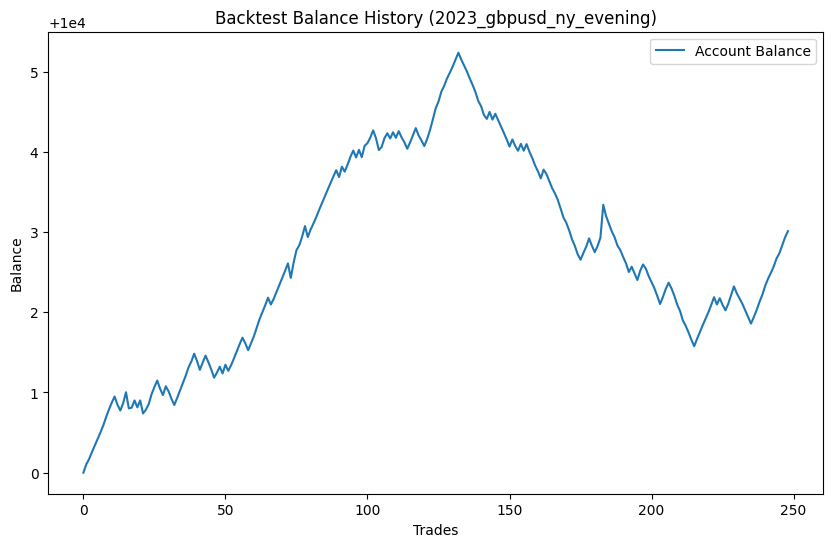

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 228
Training days: 136, Testing days: 45, Backtesting days: 47
{'Accuracy': 0.47107438016528924, 'Confusion Matrix': array([[23, 48],
       [16, 34]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.59      0.32      0.42        71\n           1       0.41      0.68      0.52        50\n\n    accuracy                           0.47       121\n   macro avg       0.50      0.50      0.47       121\nweighted avg       0.52      0.47      0.46       121\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 142
     tick                   datetime   price  predicted  actual  fx_return  \
0    3547  2023-10-18 12:14:00-04:00  1.0527          0       0  -0.110090   
1    3548  2023-10-18 13:02:00-04:00  1.0537          0 

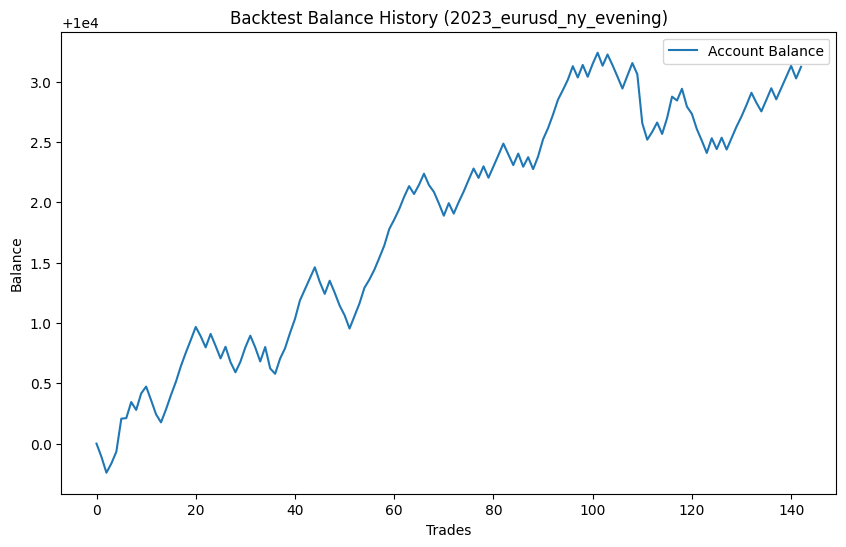

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 244
Training days: 146, Testing days: 48, Backtesting days: 50
{'Accuracy': 0.39473684210526316, 'Confusion Matrix': array([[55,  2],
       [90,  5]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.38      0.96      0.54        57\n           1       0.71      0.05      0.10        95\n\n    accuracy                           0.39       152\n   macro avg       0.55      0.51      0.32       152\nweighted avg       0.59      0.39      0.27       152\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 282
      tick                   datetime    price  predicted  actual  fx_return  \
0     8249  2023-10-17 13:49:00-04:00  149.825          0       1   0.065452   
1     8250  2023-10-17 15:40:00-04:00  149.725      

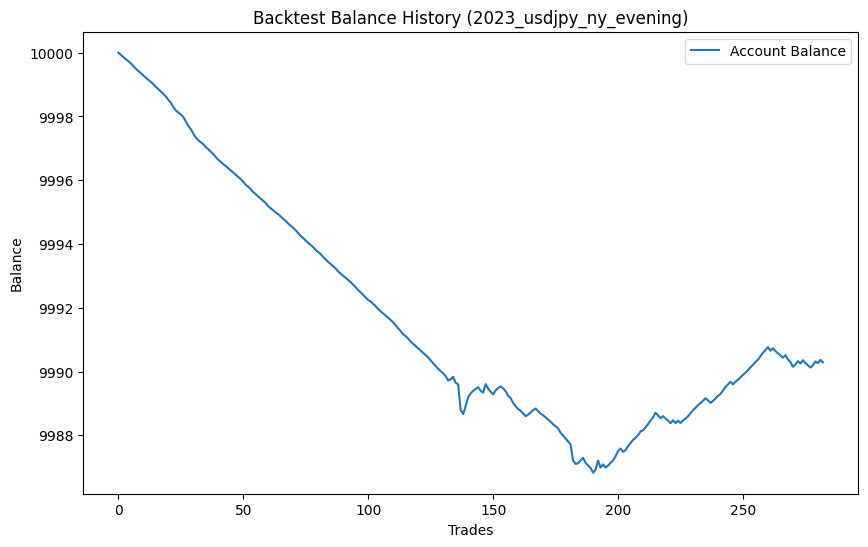

Unique session days: 131
Training days: 78, Testing days: 26, Backtesting days: 27
{'Accuracy': 0.6538461538461539, 'Confusion Matrix': array([[15,  2],
       [ 7,  2]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.68      0.88      0.77        17\n           1       0.50      0.22      0.31         9\n\n    accuracy                           0.65        26\n   macro avg       0.59      0.55      0.54        26\nweighted avg       0.62      0.65      0.61        26\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 36
    tick                   datetime    price  predicted  actual  fx_return  \
0   1550  2023-10-23 12:57:00-04:00  0.87172          0       1   0.136695   
1   1564  2023-10-26 15:58:00-04:00  0.87072          0    

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


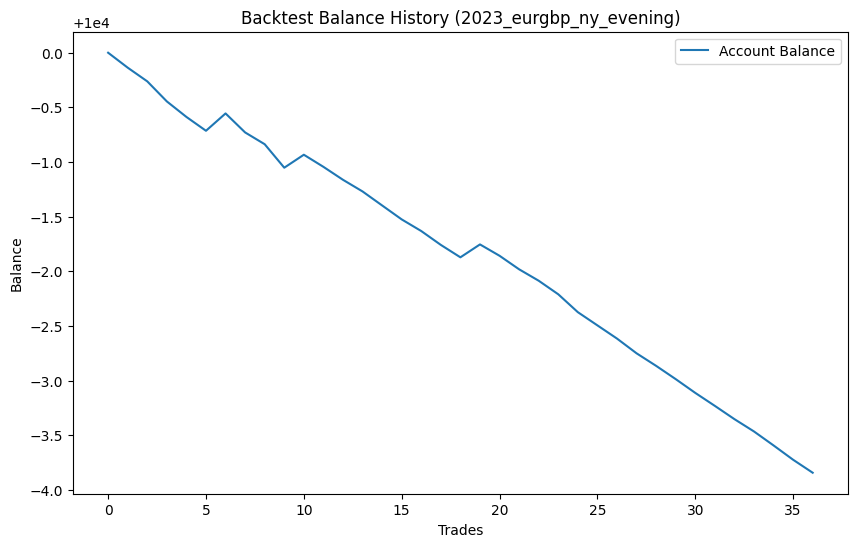

In [21]:
year = "2023"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "ny_evening"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_prev_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)